In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append("../../UCI_experiments/")

from model.utils_modified import get_toy

In [2]:
x,y = get_toy()
x = x.numpy()

In [5]:
learning_curves = []

dir_names = ["mse_model",
               "MVE_CRPS",
               "MVE_NLL",
               "shallow_ens_CRPS",
               "NLL_shallow_1",]

for subdir in dir_names:
    learning_curves.append(np.load(f"../../Convergence_toy/toy_convergence/{subdir}/loss_curve.npy"))

In [6]:
import matplotlib

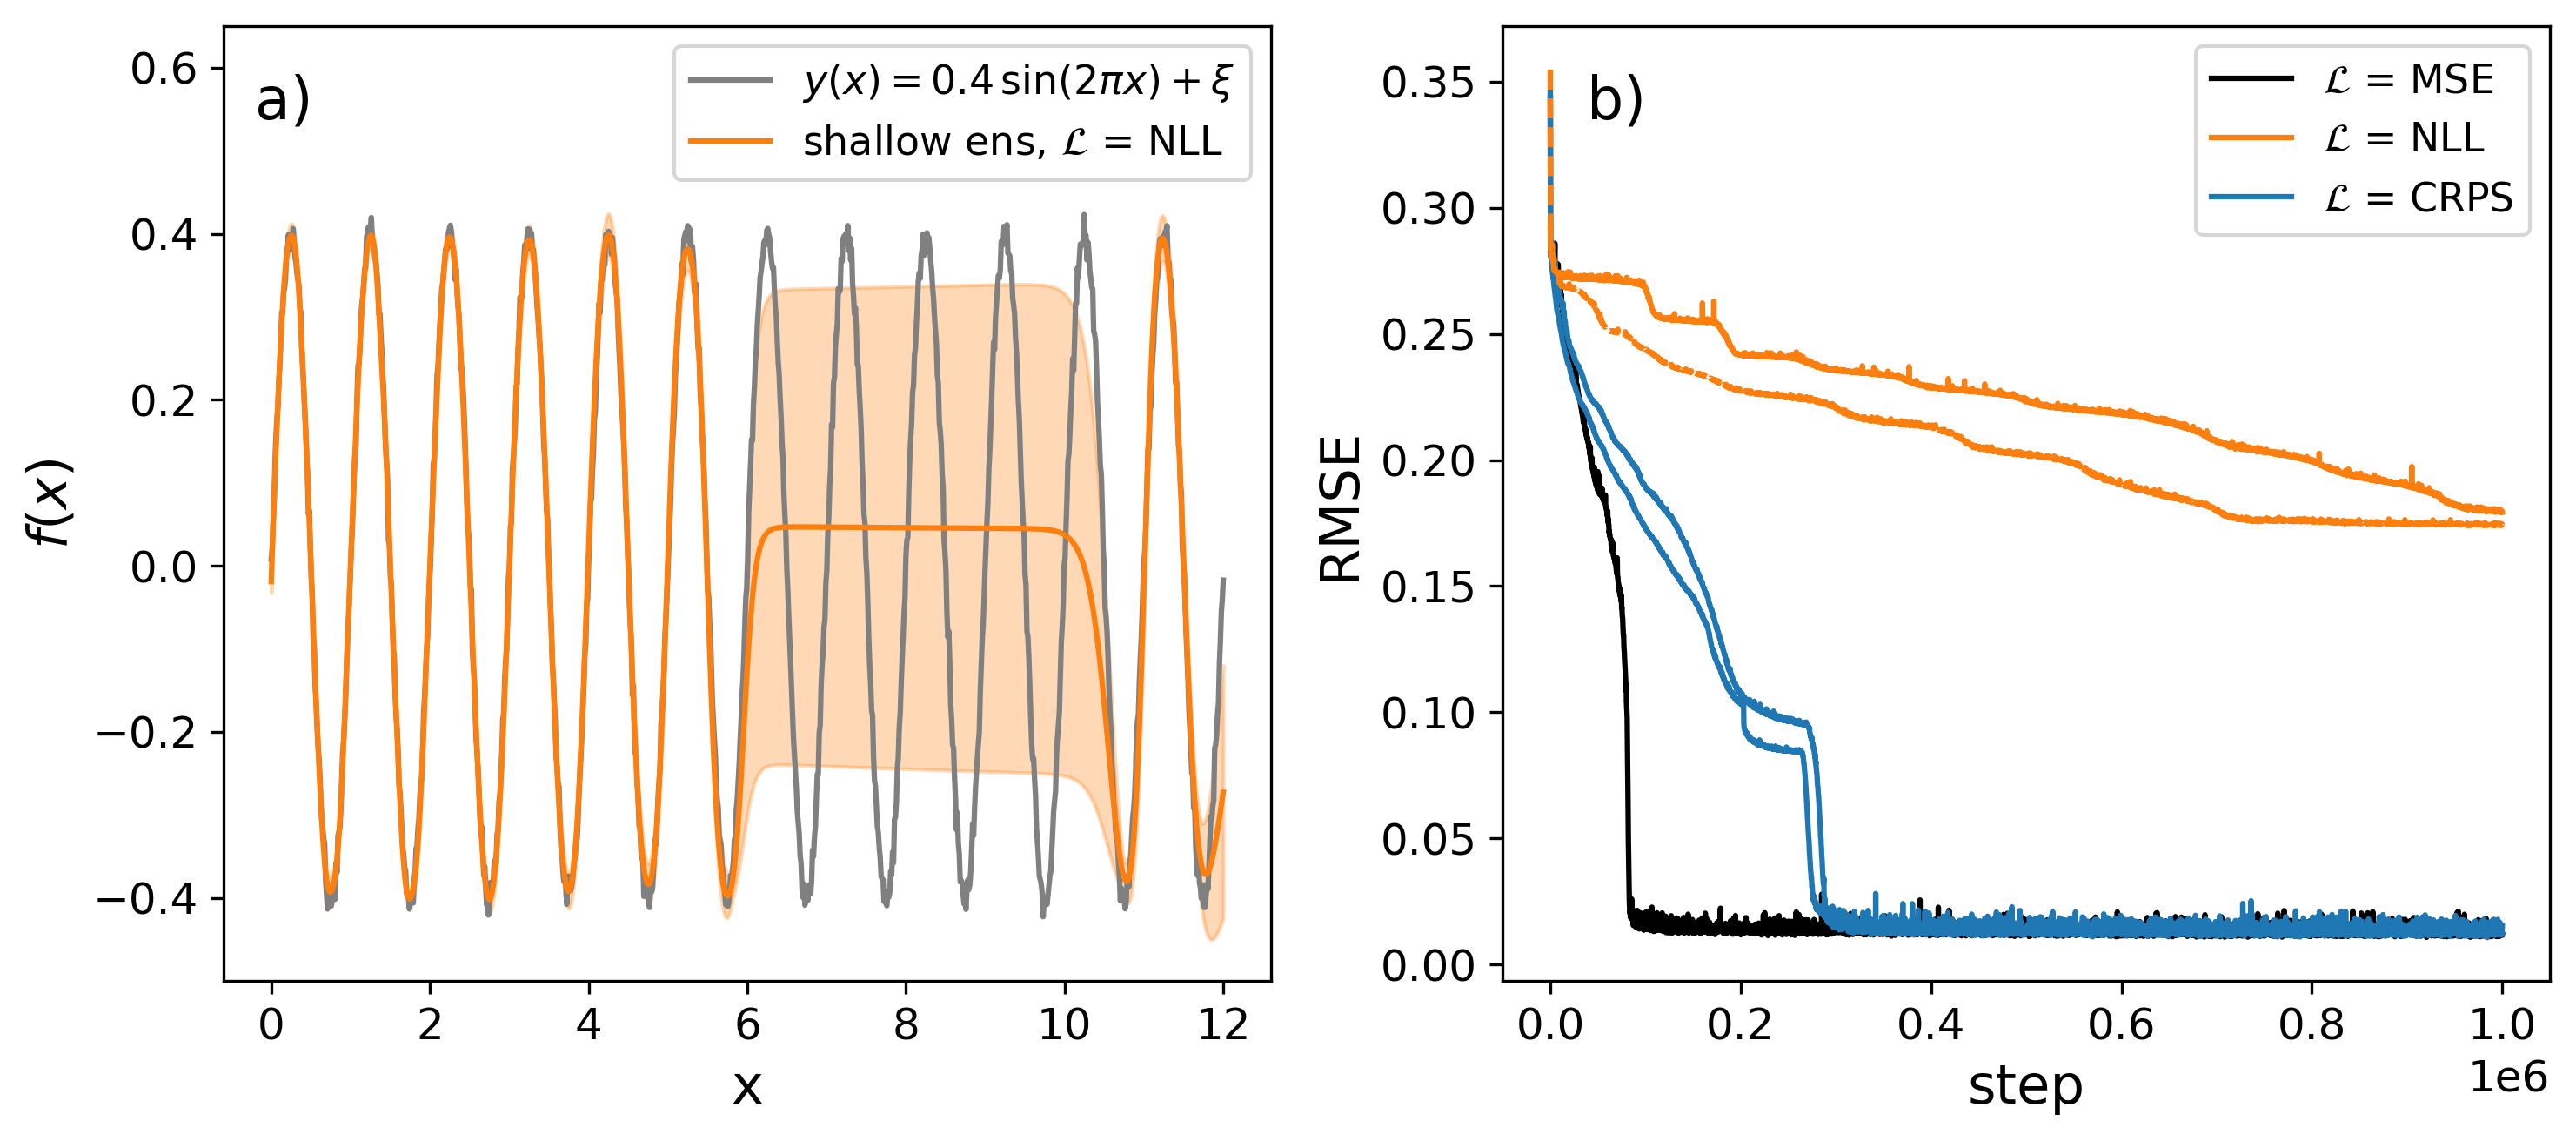

In [8]:
LINESTYLE_UNIT = "--"
COLOR_UNIT = "black"
SCATTER_SIZE = 20.
OPACITY_SCATTER = 0.8
plt.rc('axes', labelsize=13.5)
plt.rcParams.update({'font.size': 11.0})
matplotlib.rc('xtick', labelsize=12.0) 
matplotlib.rc('ytick', labelsize=12.0) 
plt.rc('axes', labelsize=15.)

fig, axs = plt.subplots(1,2,dpi=300, figsize=(10,4.5))

for learning_curve, subdir in zip(learning_curves, dir_names):
    if "MVE" in subdir:
        if "NLL" in subdir:
            l = "--"
            c="tab:orange"
        else:
            l="-"
            c="tab:blue"
        axs[1].plot(np.linspace(0,1e06,len(learning_curve)),
                learning_curve,
                linestyle=l,color=c)
    elif "shallow" in subdir:
        if "NLL" in subdir:
            l = "--"
            c="tab:orange"
        else:
            c="tab:blue"
            
        axs[1].plot(np.linspace(0,1e06,len(learning_curve)),learning_curve, color=c, )
    else:
        axs[1].plot(np.linspace(0,1e06,len(learning_curve)),learning_curve, label=r"$\mathcal{L}$ = MSE", color="black")

axs[1].plot([],[],color="tab:orange",label=r"$\mathcal{L}$ = NLL")
axs[1].plot([],[],color="tab:blue",label=r"$\mathcal{L}$ = CRPS")


axs[1].legend()
axs[1].set_xlabel("step")
axs[1].set_ylabel("RMSE")

x,y = get_toy()
x = x.numpy()
y_pred = np.load("../../Convergence_toy/toy_convergence/NLL_shallow_1/ypred.npy")
y_pred_std = np.sqrt(np.load("../../Convergence_toy/toy_convergence/NLL_shallow_1/ypred_var.npy"))
axs[0].plot(x, y, color="gray", label=r"$y(x) = 0.4\,\sin(2\pi x) + \xi$")

axs[0].fill_between(x.flatten(),(y_pred-y_pred_std).flatten(),(y_pred+y_pred_std).flatten(),color="tab:orange",alpha=0.3)
axs[0].plot(x.flatten(),y_pred.flatten(),color="tab:Orange",label="shallow ens, $\mathcal{L}$ = NLL")
axs[0].legend()
axs[0].set_xlabel("x")
axs[0].set_ylabel("$f(x)$")

# a) b) text 
axs[0].text(0.03, 0.95, 'a)', transform=axs[0].transAxes, fontsize=16,
        verticalalignment='top')
axs[0].set_ylim(-0.5, 0.65)
axs[1].text(0.08, 0.95, 'b)', transform=axs[1].transAxes, fontsize=16,
        verticalalignment='top')

fig.tight_layout()
#plt.yscale("log")
#plt.xscale("log")
plt.savefig("convergence_losses.pdf",dpi=300)

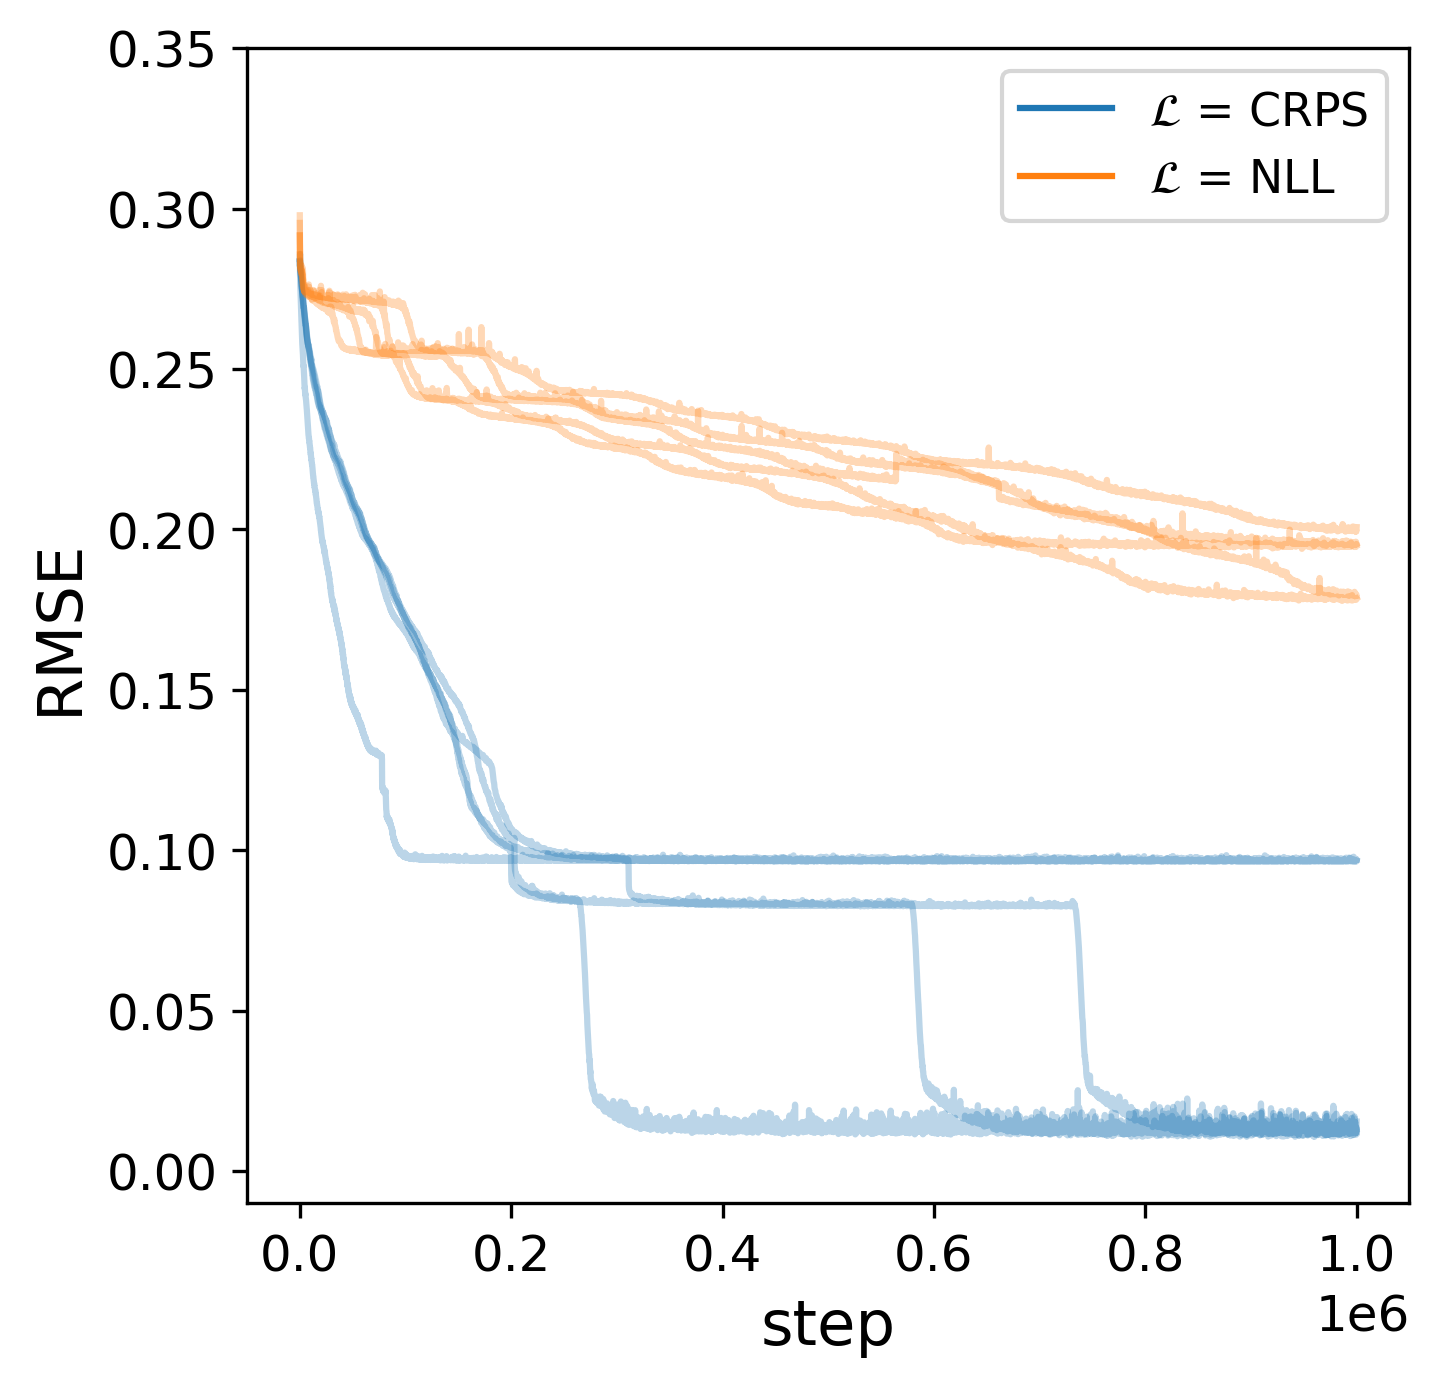

In [9]:
plt.figure(dpi=300, figsize=(5,5))

dir_names_seeds = [  "shallow_ens_CRPS",
               "shallow_ens_CRPS_1",
               "shallow_ens_CRPS_2",
               "shallow_ens_CRPS_3",
               "shallow_ens_CRPS_4",]

dir_names_seeds_nll = ["MVE_NLL",
                       "MVE_NLL_1",
                       "MVE_NLL_2",
                       "MVE_NLL_3",
                       "MVE_NLL_4"]

dir_names_seeds_nll = [
                       "NLL_shallow_1",
                       "NLL_shallow_2",
                       "NLL_shallow_3",
                       "NLL_shallow_4",
                       "NLL_shallow_5",]

learning_curves_seeds = []
learning_curves_seeds_nll = []

for subdir in dir_names_seeds:
   learning_curves_seeds.append(np.load(f"../../Convergence_toy/toy_convergence/{subdir}/loss_curve.npy"))

for subdir in dir_names_seeds_nll:
   learning_curves_seeds_nll.append(np.load(f"../../Convergence_toy/toy_convergence/{subdir}/loss_curve.npy"))

for learning_curve, subdir in zip(learning_curves_seeds, dir_names_seeds):
   plt.plot(np.linspace(0,1e06,len(learning_curve)),
        learning_curve, color="tab:blue",alpha=0.3)

for learning_curve, subdir in zip(learning_curves_seeds_nll, dir_names_seeds_nll):
   plt.plot(np.linspace(0,1e06,len(learning_curve)),
        learning_curve, color="tab:orange",alpha=0.3)

plt.plot([],[],color="tab:blue",label=r"$\mathcal{L}$ = CRPS")
plt.plot([],[],color="tab:orange",label=r"$\mathcal{L}$ = NLL")
plt.ylim(-0.01,0.35)
plt.legend()
plt.xlabel("step")
plt.ylabel("RMSE")
plt.savefig("multi_convergence.pdf",dpi=300,bbox_inches="tight")